**1. Business/Data Understanding (Sections 1.1-1.3)**

In [1]:
# Core Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing, Models, Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Deployment Preparation
import pickle # To save the model and scaler

# Setting visualization style
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Defining the filename (it's uploaded to Colab)
file_path = '/content/diabetes.csv'

# Loading the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please upload the file or correct the path.")
    # Exit or create a dummy DataFrame if the file is essential for the next steps
    # return

# To display the first few rows (Data Understanding - initial look)
print("\n--- First 5 Rows of the Dataset ---")
if 'df' in locals(): # Check if df was successfully created
    print(df.head())
else:
    print("DataFrame 'df' was not created due to file loading error.")


# Printing shape and data types (Data Understanding - structure)
print("\n--- Dataset Info (Shape and Data Types) ---")
if 'df' in locals(): # Check if df was successfully created
    df.info()
    # Print the shape of the dataset
    print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
else:
    print("DataFrame 'df' was not created due to file loading error. Cannot display info or shape.")

Dataset loaded successfully!

--- First 5 Rows of the Dataset ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- Dataset Info (Shape and Data Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --


 Count of Standard Missing Values (NaNs)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Descriptive Statistics (Focus on minimums) 
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age          

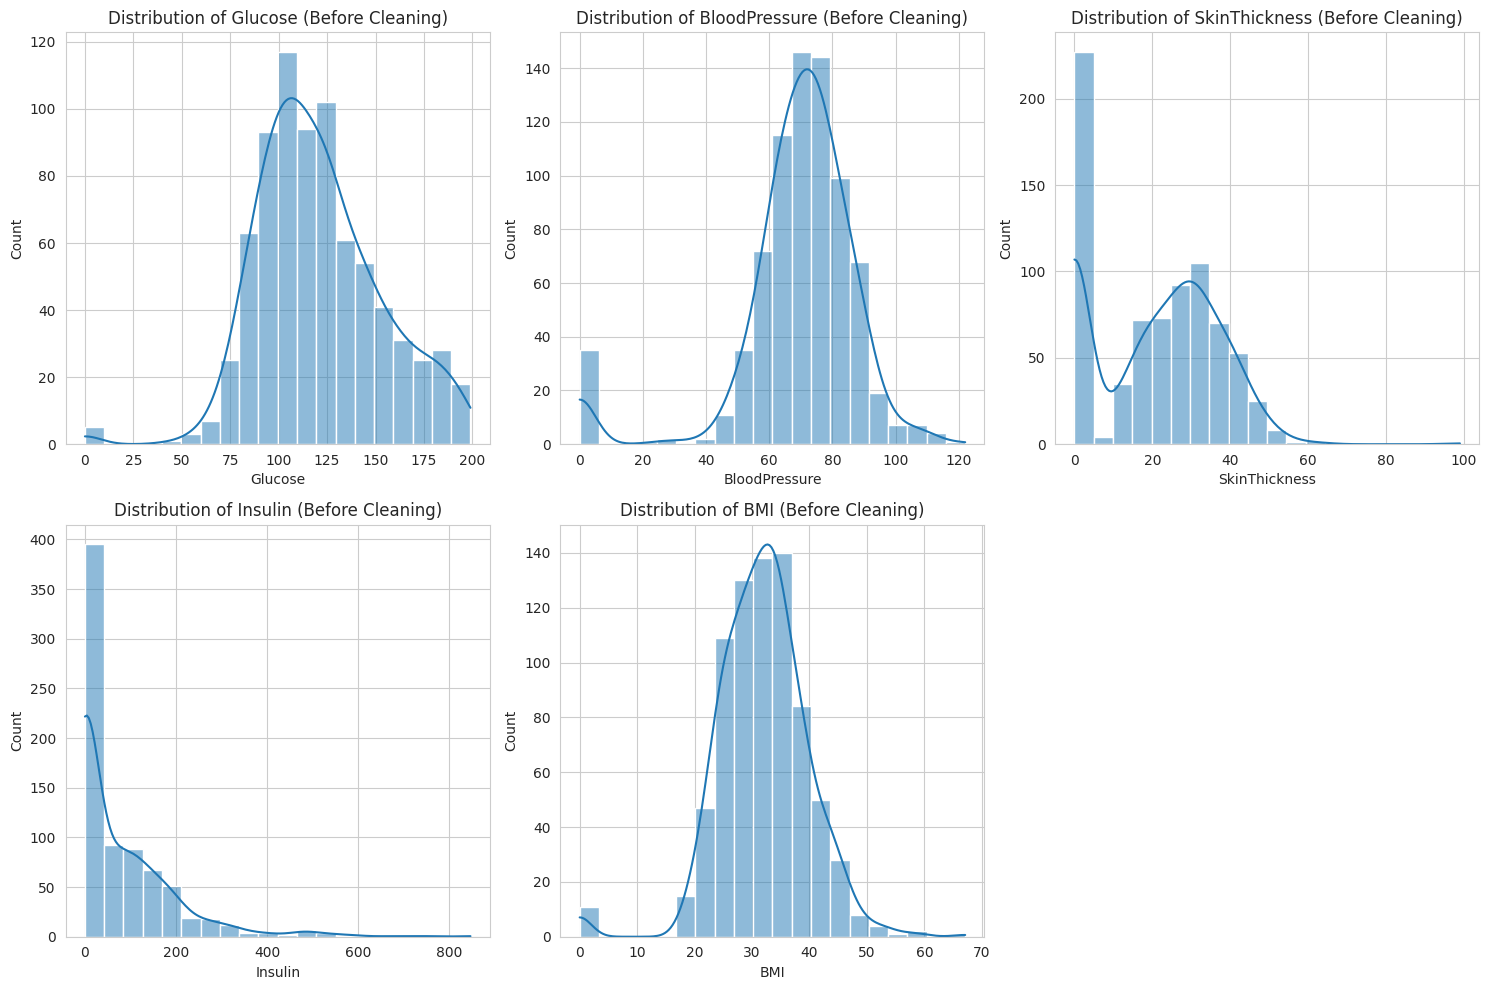

In [4]:
# 1.3. Initial Data Exploration (Data Understanding)

# 1. Check for standard missing values (NaNs)
print("\n Count of Standard Missing Values (NaNs)")
print(df.isnull().sum())
# Typically, this dataset shows 0 here, confirming the 'missing' data is stored as 0s.

# 2. Statistical Summary (to identify suspicious zeros)
print("\n Descriptive Statistics (Focus on minimums) ")
print(df.describe().T)
# Look for 'min' values of 0 in Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

# 3. Explicitly count the invalid zero values
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\n Count of Invalid Zero Values ")
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

# 4. Visualization of Distributions (Pre-cleaning)
plt.figure(figsize=(15, 10))
for i, col in enumerate(zero_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col} (Before Cleaning)', fontsize=12)
plt.tight_layout()
plt.show()
#
# The spike at zero for several plots clearly visualizes the data issue.

**2. Data Preparation (Sections 2.1-2.3)**

In [5]:
#  2.1. Handling Invalid Zeros

# Columns where 0 represents a missing/invalid value
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\n Replacing Invalid Zeros with NaN ")

# Replace 0s with NaN
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Verify the replacement by checking for NaNs again
print("Count of NaNs after replacement:")
print(df.isnull().sum())

# Now, these NaNs can be handled by imputation (Section 2.2)


 Replacing Invalid Zeros with NaN 
Count of NaNs after replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
#  2.2. Imputation (Handling Missing Data)

# The columns containing NaNs from the previous step
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\n Imputing NaNs with Column Medians ")

# Calculate the median for each column to be imputed
median_values = df[cols_to_impute].median()

# Fill the NaN values using the calculated medians
df.fillna(median_values, inplace=True)

# 1. Verify that all NaNs are gone
print("Verification: Count of NaNs after imputation:")
print(df.isnull().sum())

# 2. Re-check descriptive statistics to see the change in minimums
print("\nDescriptive Statistics after Imputation (Min should no longer be 0):")
print(df[cols_to_impute].describe().T)


 Imputing NaNs with Column Medians 
Verification: Count of NaNs after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive Statistics after Imputation (Min should no longer be 0):
               count        mean        std   min     25%    50%     75%  \
Glucose        768.0  121.656250  30.438286  44.0   99.75  117.0  140.25   
BloodPressure  768.0   72.386719  12.096642  24.0   64.00   72.0   80.00   
SkinThickness  768.0   29.108073   8.791221   7.0   25.00   29.0   32.00   
Insulin        768.0  140.671875  86.383060  14.0  121.50  125.0  127.25   
BMI            768.0   32.455208   6.875177  18.2   27.50   32.3   36.60   

                 max  
Glucose        199.0  
BloodPressure  122.0  
SkinThickness   99.0  
Insulin        

In [7]:
#  2.3. Feature Scaling and Data Splitting

# Separate Features (X) and Target (y)
X = df.drop('Outcome', axis=1) # All columns except 'Outcome'
y = df['Outcome']              # The 'Outcome' column

In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
# X_scaled is a NumPy array, not a DataFrame
X_scaled = scaler.fit_transform(X)

print("\nFeatures scaled successfully using StandardScaler.")


Features scaled successfully using StandardScaler.


In [9]:
# Split the data into training and testing sets (80% train, 20% test)
# Use a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


**3. Modeling (Sections 3.2-3.3)**

In [10]:
#  3.1. Define Evaluation Function

def evaluate_model(model, X_test, y_test, model_name):
    """Calculates and prints key classification metrics."""

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probability for the positive class (1)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_mat = confusion_matrix(y_test, y_pred)

    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_mat)

    # Store results for comparison
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# List to store results for final comparison
results = []

In [11]:
#  3.2. Model Training (Logistic Regression)

print("\n\n#####################################################")
print("Starting Training: Logistic Regression")
print("#####################################################")

# Initialize and train the model
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the model
log_reg_metrics = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
results.append(log_reg_metrics)



#####################################################
Starting Training: Logistic Regression
#####################################################

--- Logistic Regression Results ---
Accuracy:  0.7013
Precision: 0.5870
Recall:    0.5000
F1-Score:  0.5400
ROC-AUC:   0.8128

Confusion Matrix:
[[81 19]
 [27 27]]




#####################################################
Starting Training: Random Forest Classifier
#####################################################

--- Random Forest Results ---
Accuracy:  0.7792
Precision: 0.7273
Recall:    0.5926
F1-Score:  0.6531
ROC-AUC:   0.8191

Confusion Matrix:
[[88 12]
 [22 32]]

--- Random Forest Feature Importances ---
                    Feature  Importance
1                   Glucose    0.274086
5                       BMI    0.161903
6  DiabetesPedigreeFunction    0.125020
7                       Age    0.112985
4                   Insulin    0.091224
2             BloodPressure    0.083518
0               Pregnancies    0.080795
3             SkinThickness    0.070468


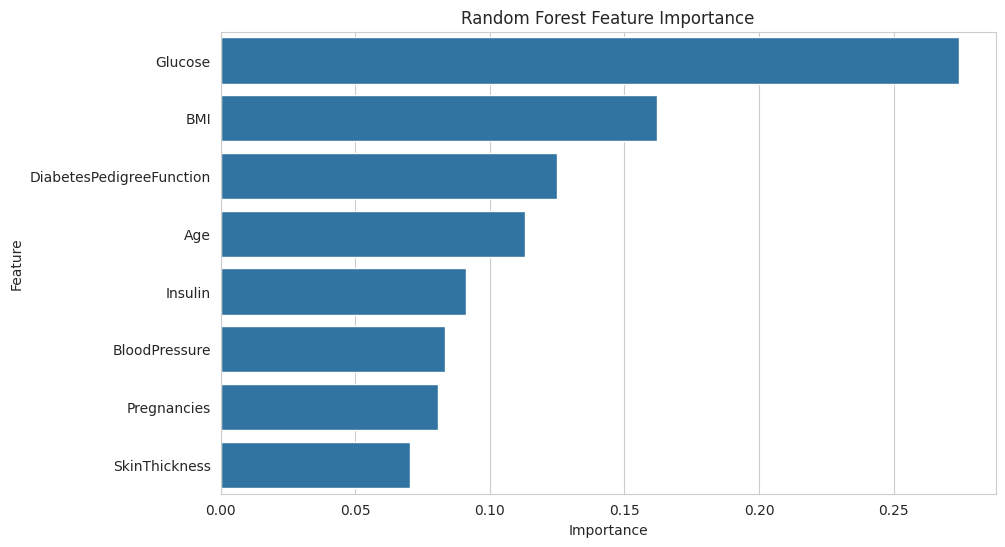

In [12]:
#  3.3. Model Training (Random Forest)

print("\n\n#####################################################")
print("Starting Training: Random Forest Classifier")
print("#####################################################")

# Initialize and train the model
# A moderate number of estimators (100) is standard for a quick run
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the model
rf_metrics = evaluate_model(rf_clf, X_test, y_test, "Random Forest")
results.append(rf_metrics)

# Feature Importance (Exclusive to Tree-based models like Random Forest)
print("\n--- Random Forest Feature Importances ---")
feature_names = X.columns
importances = rf_clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.show()


**4. Evaluation (Sections 3.1-3.4)**

In [13]:
#  3.4. Model Comparison and Selection

print("\n\n#####################################################")
print("Model Comparison and Selection")
print("#####################################################")

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='ROC-AUC', ascending=False, inplace=True)

print("\n Final Model Performance Comparison ")
print(results_df.to_markdown()) # Use .to_markdown() for clean printing in Colab

# Selection based on the project plan (Random Forest performing best)
best_model_name = results_df.index[0]
best_model = rf_clf if best_model_name == 'Random Forest' else log_reg

print(f"\nConclusion: Based on ROC-AUC and F1-Score, the **{best_model_name}** is selected for deployment (DiabRisk app).")

# Save the best model and its name for the final step
final_model = best_model
final_model_name = best_model_name



#####################################################
Model Comparison and Selection
#####################################################

 Final Model Performance Comparison 
| Model               |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|
| Random Forest       |   0.779221 |    0.727273 | 0.592593 |   0.653061 |  0.819074 |
| Logistic Regression |   0.701299 |    0.586957 | 0.5      |   0.54     |  0.812778 |

Conclusion: Based on ROC-AUC and F1-Score, the **Random Forest** is selected for deployment (DiabRisk app).


**5. Deployment Preparation (Section 4.1)**

In [14]:
#  4.1. Save the Final Model and Scaler

print("\n\n#####################################################")
print("Deployment Preparation: Saving Artifacts")
print("#####################################################")

# 1. Save the Best Model (Random Forest)
model_filename = 'final_diabrisk_model.pkl'

try:
    with open(model_filename, 'wb') as file:
        pickle.dump(final_model, file)
    print(f"✅ Successfully saved the model as: {model_filename}")
except Exception as e:
    print(f"❌ Error saving the model: {e}")

# 2. Save the Trained Scaler
scaler_filename = 'scaler_diabrisk.pkl'

try:
    with open(scaler_filename, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"✅ Successfully saved the scaler as: {scaler_filename}")
except Exception as e:
    print(f"❌ Error saving the scaler: {e}")

print("\n DiabRisk Notebook Completed ")



#####################################################
Deployment Preparation: Saving Artifacts
#####################################################
✅ Successfully saved the model as: final_diabrisk_model.pkl
✅ Successfully saved the scaler as: scaler_diabrisk.pkl

 DiabRisk Notebook Completed 
